# ПРОЕКТ

*Планирование рекламной компании для интернет-магазина "Стримчик"*

* Цель исследования:

Выявить определяющие успешность игры закономерности

* Задачи исследования:

Провести анализ данных при помощи которых предприятие разработает стратегию взаимодействия с клиентами

* Исходные данные:

Имеем таблицу, содержащую следующие данные: название игры, плафторма, год выпуска, жанр игры, продажи по разным регионам, оценки пользователей и критиков, рейтинг игры

Разобьем исследование на этапы:

* Знакомство с данными
* Подготовка данных к исследованию
* Исследовательский анализ данных
* Составление портрета пользователя для каждого региона
* Проверка статистических гипотез
* Выводы


## Знакомство с данными
Откроем файл с данными и изучим общую информацию


In [1]:
#сразу импортируем необходимые нам библиотеки

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
if os.path.exists('/datasets/games.csv'):
    data = pd.read_csv('/datasets/games.csv')
else:
    data = pd.read_csv('games.csv')

In [3]:
#посмотрим на данные

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#общая статистика датафрейма

data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
#посмотрим информацию о типах данных в разных столбцах

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.head().T

,0,1,2,3,4
Name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue
Platform,Wii,NES,Wii,Wii,GB
Year_of_Release,2006.0,1985.0,2008.0,2009.0,1996.0
Genre,Sports,Platform,Racing,Sports,Role-Playing
NA_sales,41.36,29.08,15.68,15.61,11.27
EU_sales,28.96,3.58,12.76,10.93,8.89
JP_sales,3.77,6.81,3.79,3.28,10.22
Other_sales,8.45,0.77,3.29,2.95,1.0
Critic_Score,76.0,NaN,82.0,80.0,NaN
User_Score,8,NaN,8.3,8,NaN


Можем наблюдать, что в датафрейме присутствуют пропуски, а также необходимо будет изменить тип данных в некоторых столбцах

## Подготовим данные к дальнейшему исследованию

In [7]:
#посмотрим на названия столбцов

data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [8]:
#заменим названия столбцов аналогичными, но только в нижнем регистре

data.columns=data.columns.str.lower()

In [9]:
#проверим результат

data.head().T

,0,1,2,3,4
name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue
platform,Wii,NES,Wii,Wii,GB
year_of_release,2006.0,1985.0,2008.0,2009.0,1996.0
genre,Sports,Platform,Racing,Sports,Role-Playing
na_sales,41.36,29.08,15.68,15.61,11.27
eu_sales,28.96,3.58,12.76,10.93,8.89
jp_sales,3.77,6.81,3.79,3.28,10.22
other_sales,8.45,0.77,3.29,2.95,1.0
critic_score,76.0,NaN,82.0,80.0,NaN
user_score,8,NaN,8.3,8,NaN


Привели названия столбцов к общепринятому нижнему регистру

In [10]:
#посмотрим на количество пропусков

data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Видим, что в столбцах с оценкой критиков, пользователей а также с рейтингом присутствует большое количество пропусков

Природой появления пропусков могут быть следующие факторы:

* Человеческий фактор, то есть человек просто забыл поставить оценку игре, например
* Нежелание пользователя ставить оценку той или иной игре
* Какие-либо технические сбои 
* Оценки играм выставляет Американское рейтинговое агенство, поэтому причиной появления пропусков может служить и то, что данное агенство выставляет рейтинги исключительно на территории США, а для других регионов данные оценки просто отсутствуют


Качественно заменить пропуски не представляется возможным, поскольку что замена нулевыми значениями, что замена на медианные значения могут значительно ухудшить качество данных и негативно повлиять на дальнейшее исследование

Принимаем решение оставить пропуски в данных столбцах без изменений

Пропусков в столбце с годом выпуска игры не значительное количество от общего числа строк, поэтому
их так же оставим без изменений

В столбце с оценками пользователей встречается аббривеатура "tbd", что означает 'to be determinate' - "требует уточнения".
Это может означать, что пользователь не поставил оценку данной игре

Чтобы в дальнейшем ходе работы над проектом нам эта аббривеатура не мешала, заменим ее на NaN

Округлим данные в столбце с датой релиза для удобства дальнейшего исследования

In [11]:
#округлим дату

data.year_of_release=round(data.year_of_release,0)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
#заменим tbd на Nan

data['user_score']=data['user_score'].replace('tbd','NaN')

In [14]:
#проверяем результат

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [15]:
#заменим тип данных в графе оценок пользователей на float

data['user_score']=data['user_score'].astype(float)

In [16]:
#проверяем результат

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Добавим в датафрейм новый столбец с информацией о сумме продаж по всем регионам

In [17]:
#добавим новый столбец с суммой продаж по всем регионам

data['total_sales']=data.na_sales+data.jp_sales+data.other_sales+data.eu_sales

In [18]:
#проверим результат

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Проверим исходные данные на наличие дубликатов

In [19]:
#проверка на явные дубликаты

data.duplicated().sum()

0

Явных дубликатов обнаружено не было

Проверим на наличие неявных дубликатов

Нас интересуют столбцы с названием игры и ее платформой

In [20]:
#смотрим на размер таблицы

data.shape

(16715, 12)

In [21]:
#проверяем наличие неявных дубликатов

data.duplicated(subset=['name','platform']).sum()

5

In [22]:
#удалим пять неявных дубликатов

data_new=data.drop_duplicates(subset=['name','platform'])

In [23]:
#проверяем результат

data_new.shape

(16710, 12)

Мы выявили пять неявных дубликатов с одинаковыми названиями игр и платформ

Вероятнее всего - это ошибки, так как вероятность назвать игру так же, как и платформу невелика

Принимаем решение удалить их

Выводы:

* Были заменены типы данных в некоторых столбцах для удобства дальнейшего исследования
* Было принято решение оставить пропуски в датафрейме без изменений, поскольку корректно заменить их без вреда для 
дальнейшего исследования не представляется возможным
* Пропуски в столбцах с оценками пользователей и критиков могли возникнуть по причине нежелания людей ставить оценку игре, техническими сбоями а так же тем, что оценки выставляет Американское рейтинговое агенство, что могло повлиять на непоявление оценок в других регионах
* Явных дубликатов в данных выявлено не было. Было выявлено пять неявных дубликатов с одинаковыми названиями игр и платформ. Они были удалены 
* Также для удобства дальнейшей работы был добавлен столбец с общим числом продаж компьютерных игр по всем регионам


## Проведем исследовательский анализ данных

Посмотрим на распределение количества компьютерных игр в разные годы

In [24]:
#посмотрим на уникальные значения столбца с годами

data_new['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

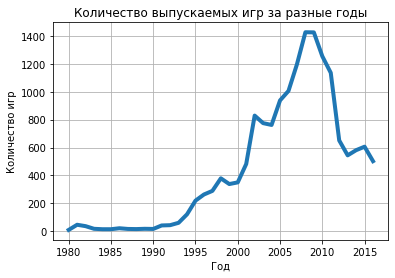

In [25]:
#изучим распределение количества игр по годам

data_new.groupby('year_of_release')['name'].count().plot(grid=True,linewidth=4)
plt.figsize=(20,20) 
plt.grid(True)
plt.title('Количество выпускаемых игр за разные годы')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()


                                        

Явный рост количества компьютерных игр можем наблюдать начиная с 1990 года

Можно связать это с ростом технического прогресса в целом, появлением новых технологий

Заметный пик продаж приходится на период с 2005 по 2010 год

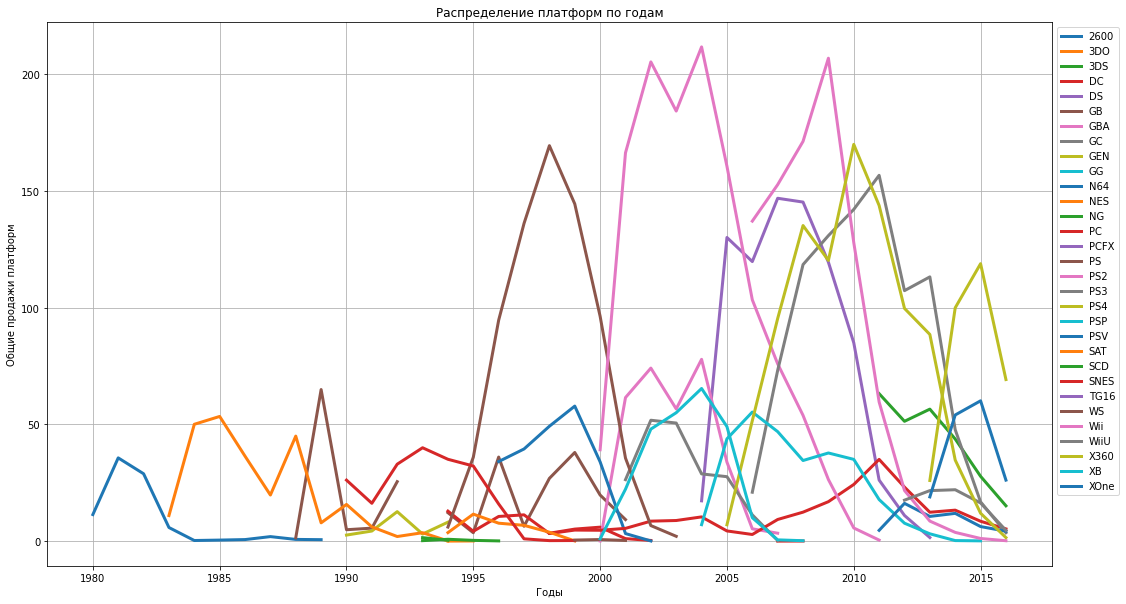

In [26]:
#посмотрим, как менялись продажи разных платформ во времени

data_new.pivot_table(index=['year_of_release'],columns='platform',values='total_sales',aggfunc='sum').plot(kind='line',linewidth=3,
grid=True,figsize=(18,10),title='Распределение платформ по годам');
plt.xlabel('Годы');
plt.ylabel('Общие продажи платформ')
plt.legend(loc=1);
plt.legend(bbox_to_anchor=(1, 1));

Рассмотрим на диаграмме, какие именно платформы продавались лучше всего по всем регионам

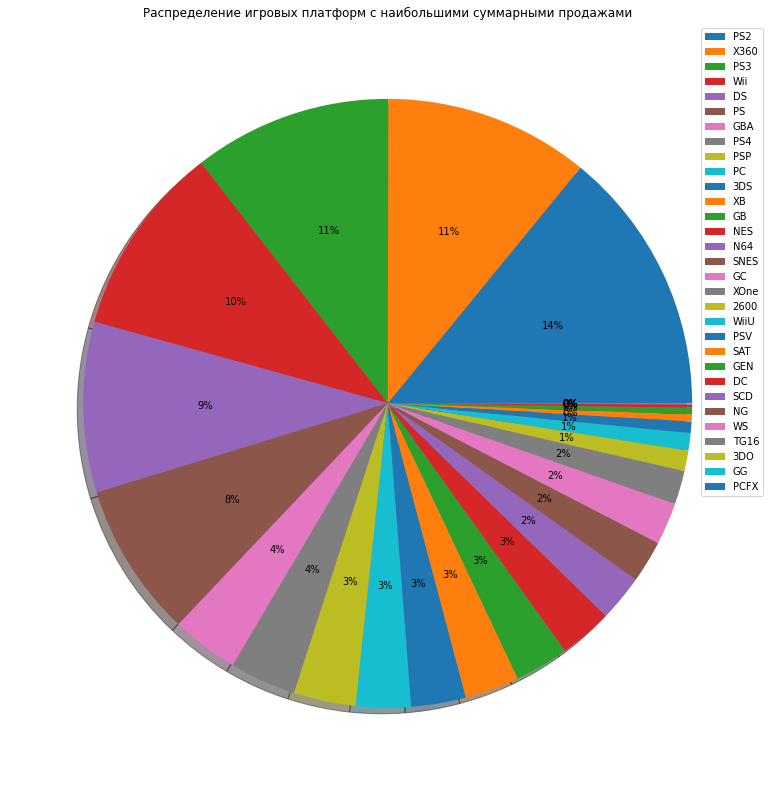

In [27]:
#посмотрим, игры на каких платформах продавались лучше всего

data_new.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).plot\
(kind='pie',autopct='%1.0f%%',labels=None,label='',figsize=(14, 14), shadow=True, legend=True)
plt.title('Распределение игровых платформ с наибольшими суммарными продажами')
plt.show()
                                        

Судя по графику продаж в разные годы, актуальным периодом можно считать период начиная с 1995 года,
когда начался заметный интерес к компьютерным играм и соответственно, рост их продаж во всем мире

Нам необходимо спрогнозировать продажу игр на 2017 год. У нас есть набор данных за достаточно большой промежуток времени. Но не все эти данные являются для нас полезными в прогнозе: компьютерная  индустрия развивается динамично, нам нет смысла брать для исследования большой временной промежуток. 

Для прогноза на 2017 год оставим данные только за три года: 2014, 2015 и 2016

In [28]:
#оставим интересующий нас период, начиная с 2014 года

data_2014=data_new.query('year_of_release>=2014')

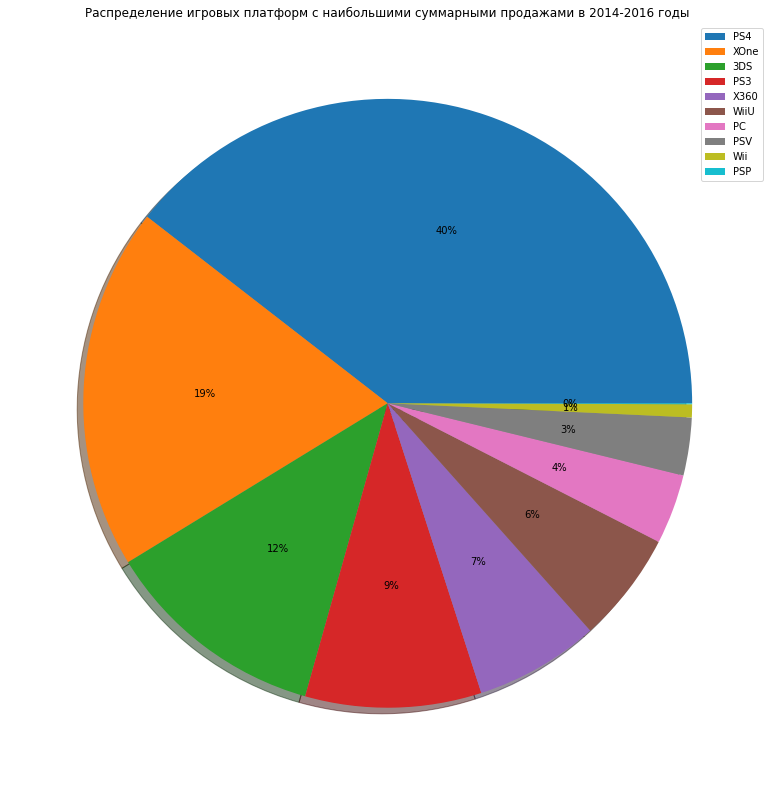

In [29]:
#посмотрим, игры на каких платформах продавались лучше всего в выбранный нами период  2014-2016 годы

data_2014.groupby('platform')['total_sales'].agg('sum').sort_values(ascending=False).plot\
(kind='pie',autopct='%1.0f%%',labels=None,label='',figsize=(14, 14), shadow=True, legend=True)
plt.title('Распределение игровых платформ с наибольшими суммарными продажами в 2014-2016 годы')
plt.show()

In [30]:
#взглянем на уникальные значения в столбце с названием платформ и их количеством

data_2014['platform'].value_counts()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
PC      151
X360    111
WiiU     73
PSP      13
Wii      11
Name: platform, dtype: int64

Из графика можем наблюдать, что наиболее продаваемыми платформами в выбранный период можно считать PS4, XOne, PS3 и 3DS

Посмотрим, как менялись продажи по этим платформам за годы

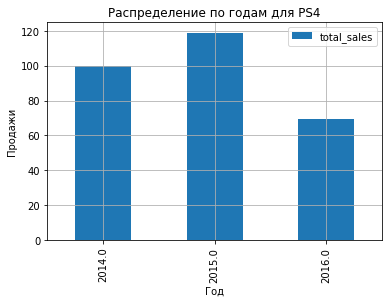

In [31]:
#посмотрим на изменение по годам для платформы PS4

data_ps4=data_2014[data_2014['platform']=='PS4']
data_ps4.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot\
(kind='bar',grid=True);
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение по годам для PS4');

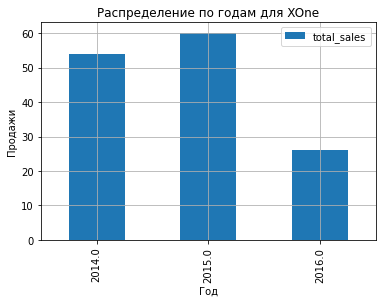

In [32]:
#посмотрим на изменение по годам для платформы XOne

data_xone=data_2014[data_2014['platform']=='XOne']
data_xone.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot\
(kind='bar',grid=True);
plt.xlabel('Год')
plt.ylabel('Продажи');
plt.title('Распределение по годам для XOne');

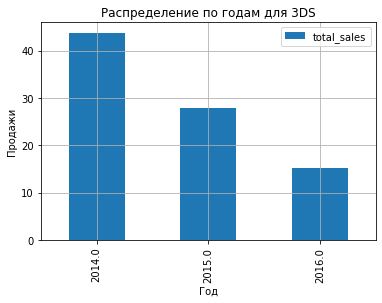

In [33]:
#посмотрим на изменение по годам для платформы 3DS

data_3ds=data_2014[data_2014['platform']=='3DS']
data_3ds.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot\
(kind='bar',grid=True);
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение по годам для 3DS');

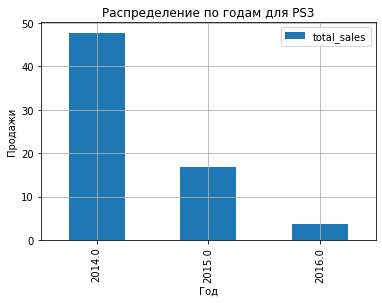

In [34]:
#посмотрим на изменение по годам для платформы PS3

data_ps3=data_2014[data_2014['platform']=='PS3']
data_ps3.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum').plot\
(kind='bar',grid=True);
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение по годам для PS3');

Судя по графикам, средний период "жизни" каждой игровой платформы составляет порядка десяти лет

Если же рассматривать выбранный нами временной отрезок, то можно заметить что платформа PS3 в 2015 году стала продаваться значительно хуже, а в 2016 году продажи стали совсем малы.

Для самых популярных платформ в выбранный период (PS4 и XOne) пик продаж пришелся на 2015 год

График продаж для платформы 3DS с 2014 года идет вниз, наблюдается падение общих продаж

Построим 'ящик с усами' по глобальным продажам игр в разбивке по платформам

In [35]:
data_bplt=data_2014.pivot_table(index='platform',values='total_sales',aggfunc='sum').\
sort_values(by='total_sales',ascending=False)
data_bplt

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


AxesSubplot(0.1,0.15;0.8x0.75)


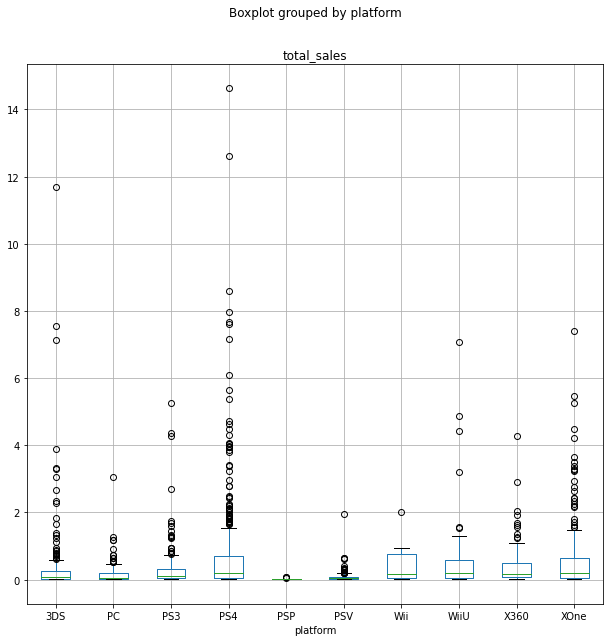

In [36]:
#построим ящик с усами для всех платформ

boxplot=data_2014.boxplot(column='total_sales',by='platform',figsize=(10,10));
print(boxplot);

AxesSubplot(0.1,0.15;0.8x0.75)


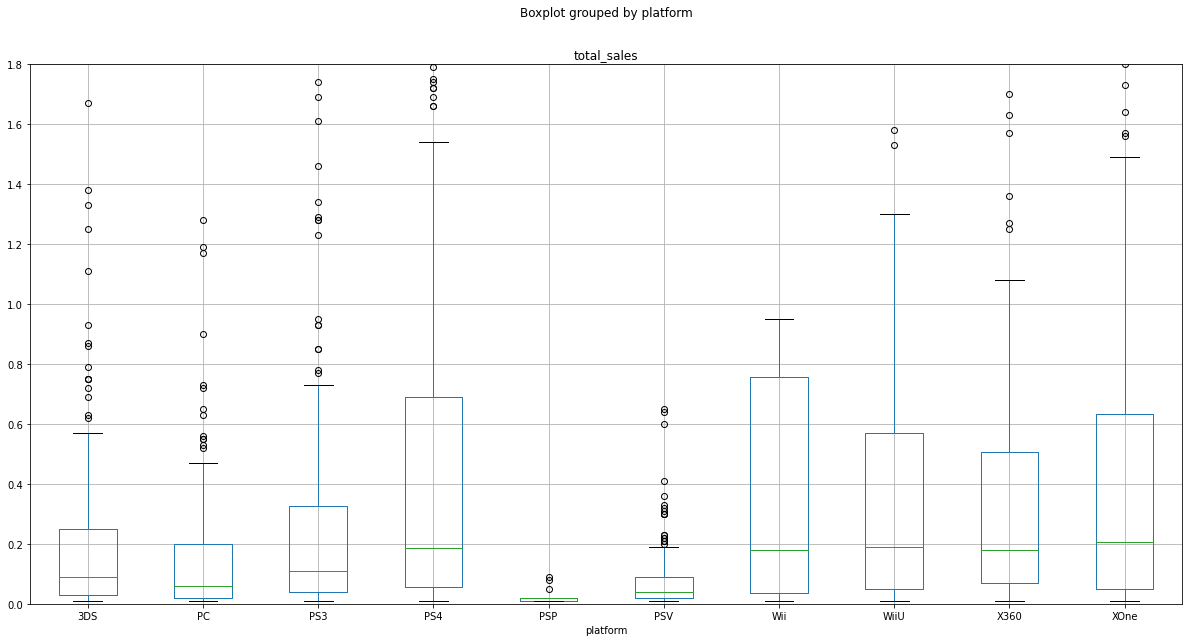

In [37]:
#посмотрим на ящик с усами более детально, чтобы увидеть медиану и квартили

boxplot=data_2014.boxplot(column='total_sales',by='platform',figsize=(20,10));
plt.ylim(0, 1.8);
print(boxplot);

Можем наблюдать значительное количество выбросов на диаграмме размаха

Особенно заметны выбросы для платформ PS4, XOne и 3DS

Далее посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Рассмотрим самую популярную платформу - PS4

In [38]:
#посмотрим на зависимость отзывов пользователей и критиков внутри самой популярной платформы - PS4

data_ps4[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


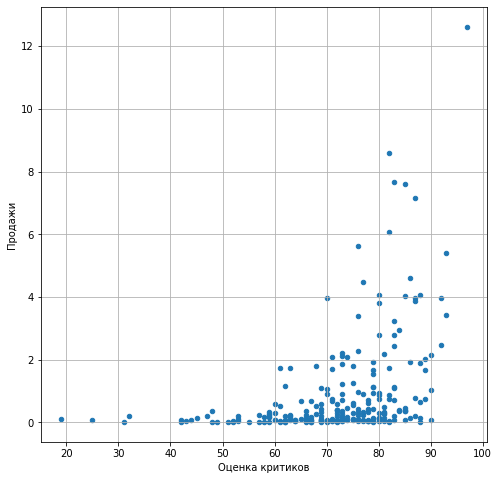

In [39]:
#построим диаграмму рассеяния для отзывов критиков

data_ps4.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(8, 8), sharex=False, grid=True);
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи');

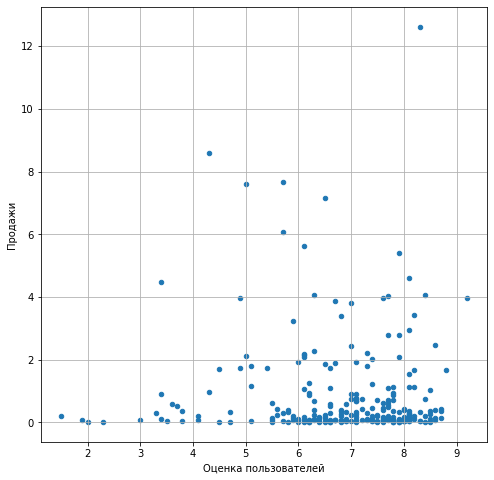

In [40]:
#построим диаграмму рассеяния для отзывов пользователей

data_ps4.plot(x='user_score',y='total_sales',kind='scatter',figsize=(8, 8), sharex=False, grid=True);
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи');

В целом можем наблюдать следующую картину:

Оценки пользователей демонстрируют обратную, слабую корреляцию степени с общим количеством продаж

Оценки критиков демонстрируют прямую, среднюю корреляцию с общим количеством продаж

Это можно наблюдать исходя из таблицы корреляций и графиков корреляций

Далее можем посмотреть на аналогичные зависимости среди других популярных и хорошо продаваемых платформ

In [41]:
#посмотрим на зависимость отзывов пользователей и критиков внутри платформы XOne

data_xone[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


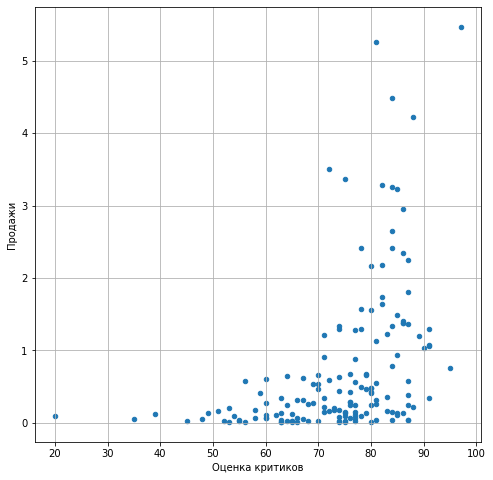

In [42]:
#построим диаграмму рассеяния для отзывов критиков

data_xone.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(8, 8), sharex=False, grid=True);
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи');

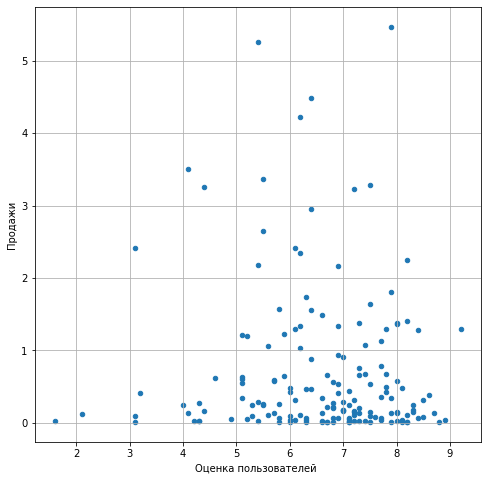

In [43]:
#построим диаграмму рассеяния для отзывов пользователей

data_xone.plot(x='user_score',y='total_sales',kind='scatter',figsize=(8, 8), sharex=False, grid=True);
plt.xlabel('Оценка пользователей ')
plt.ylabel('Продажи');

In [44]:
#посмотрим на зависимость отзывов пользователей и критиков внутри платформы 3DS

data_3ds[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


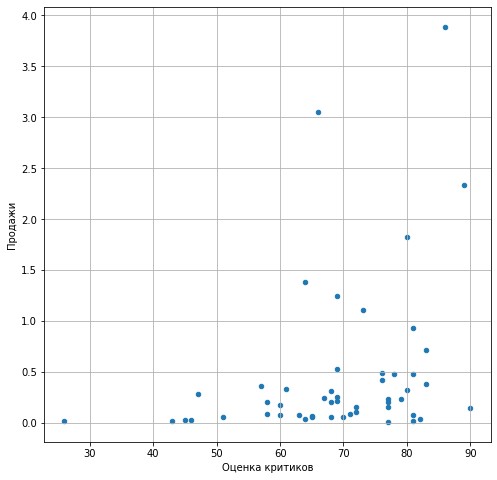

In [45]:
#построим диаграмму рассеяния для отзывов критиков

data_3ds.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(8, 8), sharex=False, grid=True);
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи');

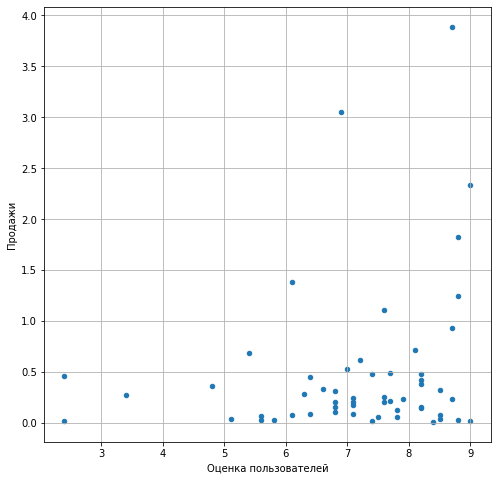

In [46]:
#построим диаграмму рассеяния для отзывов пользователей

data_3ds.plot(x='user_score',y='total_sales',kind='scatter',figsize=(8, 8), sharex=False, grid=True);
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи');

In [47]:
#посмотрим на зависимость отзывов пользователей и критиков внутри платформы PS3

data_ps3[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


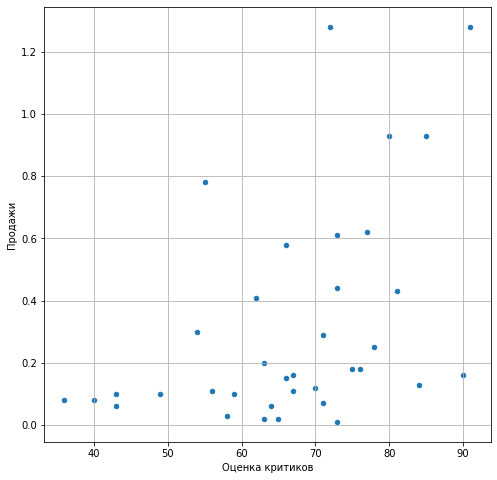

In [48]:
#построим диаграмму рассеяния для отзывов критиков

data_ps3.plot(x='critic_score',y='total_sales',kind='scatter',figsize=(8, 8), sharex=False, grid=True);
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи');

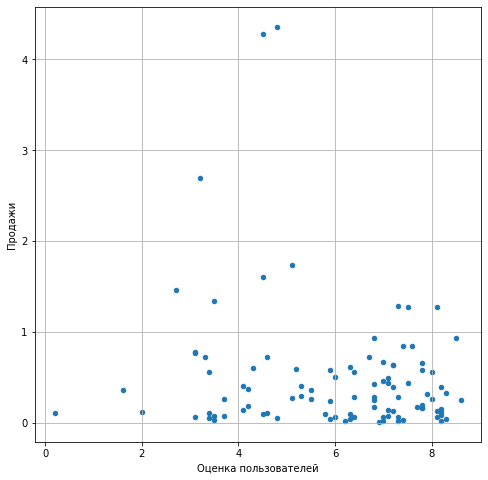

In [49]:
#построим диаграмму рассеяния для отзывов пользователей

data_ps3.plot(x='user_score',y='total_sales',kind='scatter',figsize=(8, 8), sharex=False, grid=True);
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи');

Можем отметить, что и для других платформ оценки критиков демонстрируют прямую, среднюю корреляцию с общим количеством продаж

Следом рассмотрим общее распределение игр по жанрам

Для этого возьмем медианные значения продаж, чтобы выяснить, в каком именно жанре игры приносят стабильно высокий доход

In [50]:
#посмотрим на количество медианных продаж в зависимости от жанра игр

data_genr=data_2014.pivot_table(index='genre',values='total_sales',aggfunc='median').sort_values(by='total_sales',ascending=False)
data_genr

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


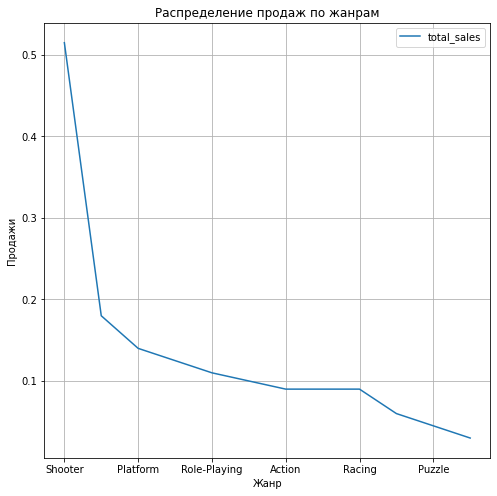

In [51]:
data_genr.plot(grid=True,figsize=(8,8));
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Распределение продаж по жанрам');

Самым прибыльным жанром, исходя из данных, можно считать жанр Shooter

Такие жанры, как Racing и Puzzle интересуют игроков значительно меньше

Выводы

* Явный рост количества компьютерных игр можем наблюдать начиная с 1995 года, заметный пик продаж приходится на период с 2005 по 2010 год 
* Для прогнозирования на 2017 год оставим данные только за 2014,2015 и 2016 годы
* Наиболее продаваемыми платформами в этот период можно считать PS4, XOne, 3DS и PS3
* Средний период "жизни" каждой игровой платформы составляет порядка десяти лет
* Оценки критиков демонстрируют прямую, среднюю корреляцию с общим количеством продаж для всех популярных платформ
* Самым прибыльным жанром, исходя из данных, можно считать жанр Shooter


## Составим портреты пользователей для каждого региона

Посмотрим на топ-5 самых популярных платформ по разным регионам

In [52]:
data_2014.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales',\
'total_sales'],aggfunc='sum').sort_values(by='total_sales',ascending=False).head(5)

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS4,130.04,15.02,98.61,288.15
XOne,46.25,0.32,81.27,140.36
3DS,16.12,44.24,22.64,86.68
PS3,25.54,11.22,22.05,68.18
X360,15.49,0.08,28.30,48.22


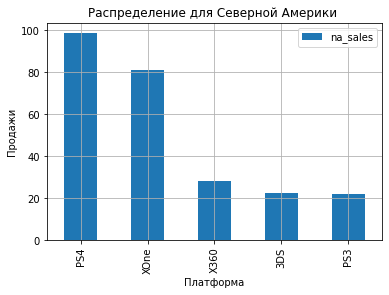

In [53]:
#посмотрим на продажи пяти самых популярных платформ в Северной Америке

data_2014.pivot_table(index='platform',values='na_sales',aggfunc='sum').sort_values\
(by='na_sales',ascending=False).head(5).plot(kind='bar',grid=True);
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Распределение для Северной Америки ');

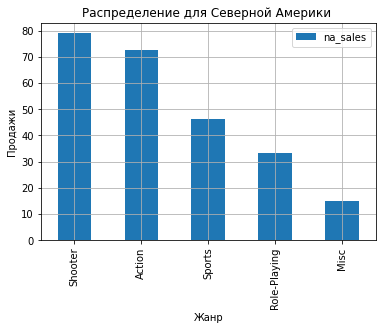

In [54]:
#посмотрим на продажи пяти самых популярных жанров в Северной Америке

data_2014.pivot_table(index='genre',values='na_sales',aggfunc='sum').sort_values\
(by='na_sales',ascending=False).head(5).plot(kind='bar',grid=True);
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Распределение для Северной Америки ');

При предобработке данных мы ничего не делали со столбцом с оценками Американского агенства рейтингов 

Сейчас для корректного исследования, чтобы данные не потерялись, заменим значения NaN в этом столбце на "Nothing"

In [55]:
#заменим NaN на "Nothing"

data_2014_nan_rating=data_2014

In [56]:
data_2014_nan_rating['rating']=data_2014_nan_rating['rating'].fillna('Nothing')

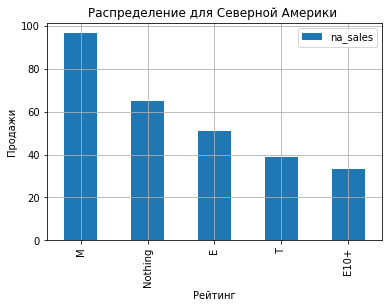

In [57]:
#посмотрим на влияние рейтинга ESRB в Северной Америке

data_2014_nan_rating.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values\
(by='na_sales',ascending=False).plot(kind='bar',grid=True);
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Распределение для Северной Америки ');

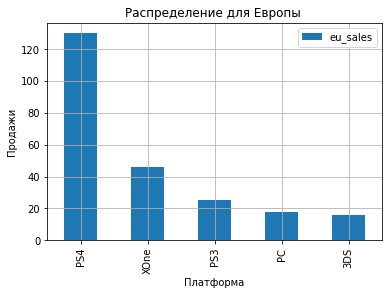

In [58]:
#посмотрим на продажи пяти самых популярных платформ в Европе

data_2014.pivot_table(index='platform',values='eu_sales',aggfunc='sum').sort_values\
(by='eu_sales',ascending=False).head(5).plot(kind='bar',grid=True);
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Распределение для Европы ');

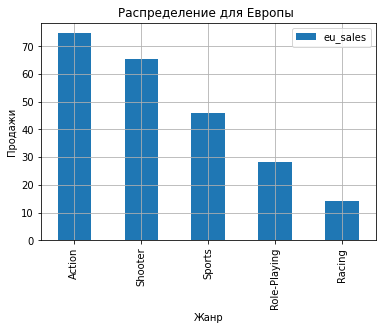

In [59]:
#посмотрим на продажи пяти самых популярных жанров в Европе

data_2014.pivot_table(index='genre',values='eu_sales',aggfunc='sum').sort_values\
(by='eu_sales',ascending=False).head(5).plot(kind='bar',grid=True);
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Распределение для Европы ');

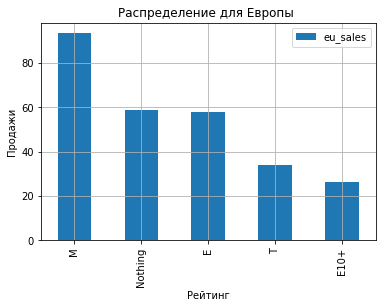

In [60]:
#посмотрим на влияние рейтинга ESRB в Европе

data_2014_nan_rating.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values\
(by='eu_sales',ascending=False).plot(kind='bar',grid=True);
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Распределение для Европы ');

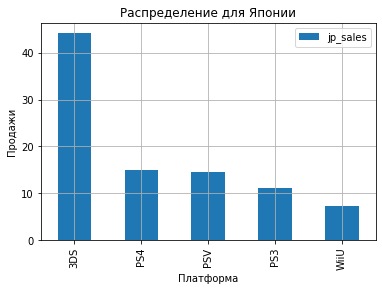

In [61]:
#посмотрим на продажи пяти самых популярных платформ в Японии

data_2014.pivot_table(index='platform',values='jp_sales',aggfunc='sum').sort_values\
(by='jp_sales',ascending=False).head(5).plot(kind='bar',grid=True);
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.title('Распределение для Японии');

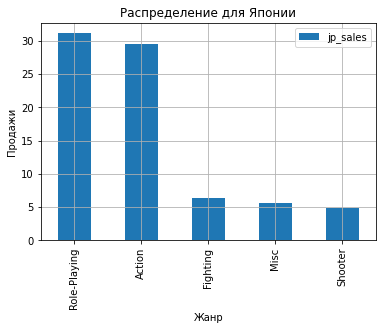

In [62]:
#посмотрим на продажи пяти самых популярных жанров в Японии

data_2014.pivot_table(index='genre',values='jp_sales',aggfunc='sum').sort_values\
(by='jp_sales',ascending=False).head(5).plot(kind='bar',grid=True);
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Распределение для Японии');

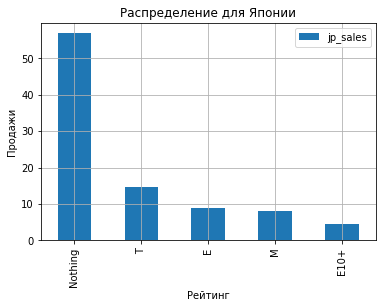

In [63]:
#посмотрим на влияние рейтинга ESRB в Японии

data_2014_nan_rating.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values\
(by='jp_sales',ascending=False).plot(kind='bar',grid=True);
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Распределение для Японии');

Выводы

* В Северной Америке и в Европе наиболее популярными жанрами игр являются Action и Shooter, а вот в Японии - Action и ролевые игры
 
*  Платформа PS4 является наиболее популярной в Северной Америке и в Европе, в Японии же преобладют платформы 3DS

* В Европе и Северной Америке лидирующим рейтингом является "М"
* Американское рейтинговое агенство очевидно, выставляет оценки для игр в Северной Америке, именно поэтому в Японии доминирующим рейтингом является "Nothing" - как раз то значение, которые мы вручную выставили для пропусков в столбце с рейтингами

## Проверим гипотезы

Проверим сначала следующую гипотезу:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Исходя из общепринятой практики, нулевую гипотезу всегда будем формулировать о равенстве средних, несмотря на первоначальную постановку задачи

Сформулируем нулевую и альтернативную гипотезы:


𝐻0:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

𝐻1:Средние пользовательские рейтинги платформ Xbox One и PC разные

Для начала проверим, насколько распределения выборок близки к нормальным

 

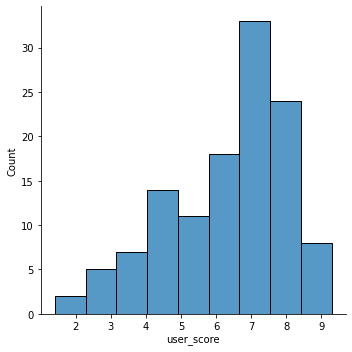

In [64]:
#отфильтруем новую таблицу только с платформами PC
#видим, что распределение не нормальное

data_pc=data_2014[data_2014['platform']=='PC']
sns.displot(data_pc['user_score']);


In [65]:
#отфильтруем новую таблицу только с платформами XBox

data_xbox=data_2014[data_2014['platform']=='XOne']

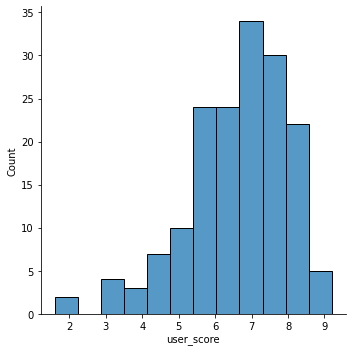

In [66]:
#видим, что распределение не нормальное

sns.displot(data_xbox['user_score']);

Для уверенности построим QQ-графики

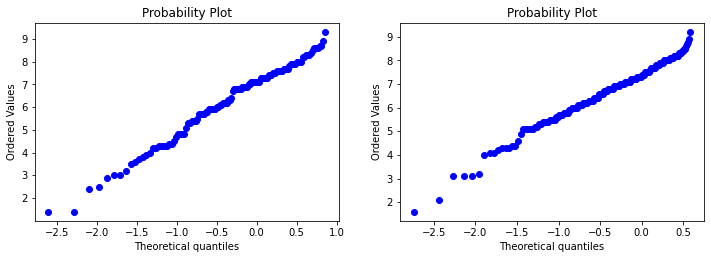

In [67]:
#удостоверимся, что распределение не нормальное

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(data_pc['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(data_xbox['user_score'], dist="norm", plot=plt)
plt.show()

In [68]:
#зададим уровень значимости в 0.05

alpha=0.05

Так как мы видим, что распределения отличаются от нормальных, воспользуемся непараметрическим тестом Манна-Уитни

Если p-value будет меньше выбранного уровня значимости  𝛼=0.05,
 то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу
 
 Необходимо отметить следующее: поскольку в оценках присутствуют пропуски, для корректного выполнения теста необходимо указать параметр 'nan_policy' равный 'omit', чтобы тест был осуществлен корректно 
 
 Данный параметр был взят из документации к непараметрическому тесту Манна-Уитни

In [69]:
#проведем тест Манна-Уитни

results = st.mannwhitneyu(data_pc['user_score'], data_xbox['user_score'],nan_policy='omit')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.27752869727762175
Не получилось отвергнуть нулевую гипотезу


По результатам теста Манна-Уитни не получилось отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и  PC

Проверим еще одну гипотезу:

Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и альтернативную гипотезы:


𝐻0:Средние пользовательские рейтинги платформ Action и Sports одинаковые

𝐻1:Средние пользовательские рейтинги платформ Action и Sports разные

Для начала проверим, насколько распределения выборок близки к нормальным




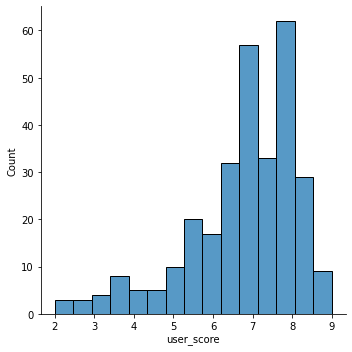

In [70]:
#отфильтруем новую таблицу только с жанрами Action
#видим, что распределение не нормальное

data_action=data_2014[data_2014['genre']=='Action']
sns.displot(data_action['user_score']);

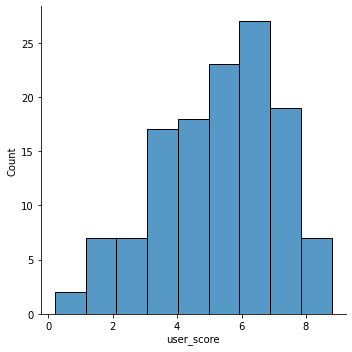

In [71]:
#отфильтруем новую таблицу только с жанрами Sport

data_sport=data_2014[data_2014['genre']=='Sports']
sns.displot(data_sport['user_score']);

Для уверенности построим QQ-графики

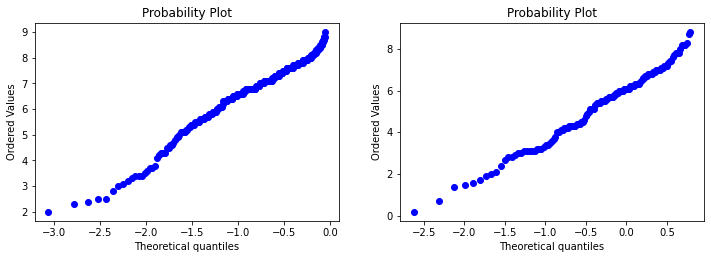

In [72]:
#удостоверимся, что распределение не нормальное

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(data_action['user_score'], dist="norm", plot=plt)
plt.subplot(2,2,2)
st.probplot(data_sport['user_score'], dist="norm", plot=plt)
plt.show()

Так как мы видим, что распределения отличаются от нормальных, воспользуемся непараметрическим тестом Манна-Уитни

Если p-value будет меньше выбранного уровня значимости  𝛼=0.05,
 то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу

In [73]:
#проведем тест Манна-Уитни

results = st.mannwhitneyu(data_action['user_score'], data_sport['user_score'],nan_policy='omit')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2166879280294303e-16
Отвергаем нулевую гипотезу


По результатам теста Манна-Уитни мы вынуждены отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Action и Sports

Но так как изначально гипотеза была сформулирована следующим образом: 'Средние пользовательские рейтинги жанров Action и Sports разные',

а при проведении теста мы взяли нулевую гипотезу о равенстве средних, то по итогу мы можем предполагать, что вероятность равенства средних оценок жанров Action и Sports невелика, или же так: "весьма велика вероятность того, что средние пользовательские рейтинги жанров Action и Sports разные "

## Общий вывод

Нам необходимо было спрогнозировать рекламную компанию для интернет-магазина компьютерных игр на 2017 год.

Проведя необходимые исследования, для получения максимальной выручки для магазина "Стримчик" можно пореккомендовать обратить внимание на следующие аспекты:

* Безусловно, не стоит обращать свое внимание на платформы, которые уже не представляют интереса для покупателей. Рынок игр очень динамичен, не стоит на месте, срок 'жизни' каждой платформы составляет около десяти лет. Рассмотрев актуальные платформы по нескольким регионами, можно смело реккомендовать остановить свой выбор на сравнительно новых игровых платформах, таких как PS4 и Xbox One 

* Конечно, есть смысл не забывать об оценках критиков: это важная вещь, связь между общими продажами и оценками экспертов для всех платформ является прямой, средней степени выраженности 

* В ходе исследования были выявлены жанры, которые вызывают наибольший интерес у игроков: Shooter, Action и Role-Playing. Есть смысл в приоритетном внимании к данным жанрам игр, поскольк именно они могут принести наибольшую выручку 

* Необходимо так же учитывать и регион продаж игр: в каждом регионе есть свои особенности, в частности, влияние рейтинга Американского рейтингово агенства заметно только в Северной Америке и Европе, для других рынков он не оказывает влияния 

* Следуя вышесказанным реккомендациям, у интернет-магазина "Стримчик" есть высокие шансы опередить своих конкурентов и получить высокую прибыль от продаж игр
